
# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [ConvNet 구성요소](#ConvNet-구성요소)
* [ResNet](#ResNet)
* [Batch Normalization](#Batch-Normalization)
      
  
---

## ConvNet 구성요소
1. convolution
    -  **locally connected shared weights**
        - 학습할 파라미터가 줄어듦
        - transitional invariant(위치와 무관하게 특정 특성 파악)
        - 기존의 딥뉴럴네트워크는 위치에 민감함
    - 회전, 크기를 탐지 잘 못하기 땨문에 **data augmentation**으로 학습함
2. pooling
    - 대표값으로 바꾸어 크기를 줄이고 특성 유지
    - avg pooling, Max Pooling
    - 안쓰는 경향이 있음
3. Fully connected
    -  **Global Avg Pooling** 2013 NIN, GooLeNEt
4. Activation function
    - **non-linearity** 비선형 
5. normalization
    - input 
    - **Normal batch normalization**
---
## ResNet
2015년에 인간을 뛰어넘음
- 논문: Deep Residual Learining for Image Recognition
- Residual Learning 
    - identity shortcut connection
- Batch Normalizaton
  - degradation 문제를 해결
  - 152개의 레이어를 깊게 쌓아도 학습이 잘됨

In [ ]:
import tensorflow as tf

In [ ]:
#Transfer learning 남이 만든 모델 가져옴, include_top dense 가져오면 학습시킨거 그대로 사용하는것
tf.keras.applications.VGG16 #2014
tf.keras.applications.ResNet50 #inception으로 확장 인간을 넘음.

<function tensorflow.python.keras.applications.resnet.ResNet50>

In [ ]:
 #처음에만 다운로드하고 그다음부터 캐쉬되어 바로 사용 가능
resnet=tf.keras.applications.ResNet50( )
vgg=tf.keras.applications.VGG16()

vgg ,resnet 구조 차이점
- resnet 구조 :connected to 존재
  - multi- inputs, ouputs 때문에 어느 레이어로 연결 되는지 표시

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [83]:
resnet.summary() #connected to -> multi-inputs&outputs

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

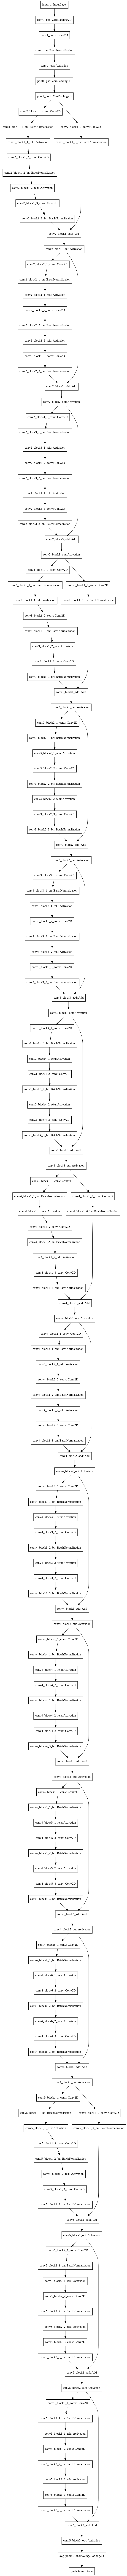

In [ ]:
tf.keras.utils.plot_model(resnet) #multi inputs & outputs  -> stacking 

In [86]:
resnet.inputs  , resnet.outputs

([<tf.Tensor 'input_8:0' shape=(None, 224, 224, 3) dtype=float32>],
 [<tf.Tensor 'predictions/Softmax_3:0' shape=(None, 1000) dtype=float32>])

**layer** [layer1, layer2... layer n]
- 각 레이어는 weights (kernel, bias)

In [ ]:
len(resnet.layers) # 177layers

177

In [ ]:
len(tf.keras.applications.ResNet50( include_top=False ).layers) # dense 없는 경우 175 layers

94773248/94765736 [==============================] - 1s 0us/step


175

In [ ]:
resnet.layers[18] #전체에서 위치 기반으로

In [90]:
resnet.get_layer('conv5_block1_3_conv') # 이름 기반으로

In [91]:
len(resnet.get_layer('conv5_block1_3_conv').weights )

2

In [87]:
len(resnet.get_layer('conv5_block3_3_bn').weights ) #batch normalization

4

In [85]:
resnet.get_layer('conv5_block3_3_bn').output #layer 구성 알 수 있음 

<tf.Tensor 'conv5_block3_3_bn/cond_2/Identity:0' shape=(None, 7, 7, 2048) dtype=float32>

ResNet 이후에는 간단한데 좋은 성능을 내는 모델로 경향이 바뀌었음
> 오캄의 면도날: 같은 성능이면 간단한게 좋다!


In [ ]:
tf.keras.applications.EfficientNetB0, tf.keras.applications.mobilenet  #Efficient, mobile 더 간단한 구조

(<function tensorflow.python.keras.applications.efficientnet.EfficientNetB0>,
 <module 'tensorflow.keras.applications.mobilenet' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/applications/mobilenet/__init__.py'>)

### tensorflow model
1. tf.nn
2. estimator
3. keras sequential
4. keras Model
5. keras Model subclassing
    - multi-input,multi-output 가능해서 복잡한 모델 만듦
    - functional paradigm 이용해서 만듦

In [ ]:
# 이용해서 두개의 input 받아서 더함
inputs=tf.keras.Input(shape=(28,28))     #input_shape 대신 가능 
layer1=tf.keras.layers.Dense(64)(inputs) #functional paradigm
layer2=tf.keras.layers.Dense(64)(inputs)
layer3=tf.keras.layers.Dense(64)(layer1)
layer4=tf.keras.layers.Add(  )([layer1,layer3]) # layer 리스트 형태로 받아서 더함

model =tf.keras.models.Model(inputs= inputs, outputs=layer4 )

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 28, 64)       1856        input_3[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 28, 64)       4160        dense[0][0]                      
__________________________________________________________________________________________________
add (Add)                       (None, 28, 64)       0           dense[0][0]                      
                                                                 dense_2[0][0]         

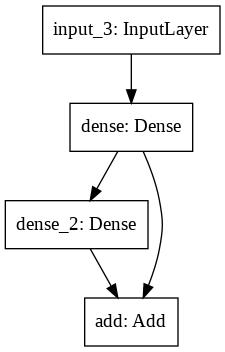

In [ ]:
tf.keras.utils.plot_model(model) #resnet의 shortcut과 비슷 

In [ ]:
# 두개의 input 받아서 합침
inputs=tf.keras.Input(shape=(28,28))     #input_shape 대신 가능 
layer1=tf.keras.layers.Dense(64)(inputs) #functional paradigm
layer2=tf.keras.layers.Dense(64)(inputs)
layer3=tf.keras.layers.Dense(64)(layer1)
layer4=tf.keras.layers.Concatenate( )([layer1,layer3]) #layer 리스트 형태로 받아서 결합

model =tf.keras.models.Model(inputs= inputs, outputs=layer4 )

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 28, 64)       1856        input_4[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 28, 64)       4160        dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 128)      0           dense_3[0][0]                    
                                                                 dense_5[0][0]         

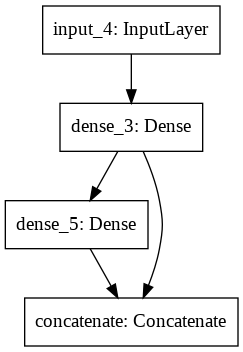

In [ ]:
tf.keras.utils.plot_model(model) #resnet의 shortcut과 비슷 

- NFL ,마법과 같은 공식은 없습니다.
  - auto ml: 유전자 알고리즘 이용해서 좋은 알고리즘 파라미터를 찾는 optimization, 강화학습이용해서 제일 좋은 구조를 찾음
- 모델 구조 만들고 난 후 compile(학습전략)


In [ ]:
# 레이어 연산: 여러개 레이어에서 온 결과값을 다양하게 연산(array 연산)
tf.keras.layers.Add
tf.keras.layers.Average
tf.keras.layers.Concatenate
tf.keras.layers.Lambda   #레이어값을 함수형 기법 이용
tf.keras.layers.Multiply
tf.keras.layers.Subtract 

tensorflow.python.keras.layers.merge.Subtract

## Stability
Deep Networks very hard to train!
- 모델 복잡하면 해석력이 커지기 때문에 깊을수록 좋다는것은 상식
- 깊게 쓰면 degradation -> (underfitting)
- Gradient vanishing
  - 끝단 값은 사라지게되어 학습이 잘 안됨(saturation)
- Gradient exploding
 - 누적되어서 너무커지게 되어 발산하면서 loss 최소화가 안 됨.

 1. 데이터 전처리
 2. 활성화 함수 relu
 3. optimizer
 4. gradient clipping
 5. small learning rate
 6. weight initialization
 7. **normalization**
 

## Underfitting
1. 활성함수: sigmoid, tanh쓰면 gradient vanishing문제가 생겨서 학습이 안 됨 => ReLu
2. loss는 문제 도메인 따라 정해지지만 optimizer(loss function을 다양한 gradeint 방식으로 학습여부가 달라짐)는 지정
  - Adam, Rectified Adam..

-> layers 깊어지면 불가..weight,bias바뀌어서 새로운 결과값으로 됨.
  -  weight,bias 때문에 layer output값 범위/분포가 계속 바뀌게 되어서 feed forward 로 누적되어서 학습이 안되는 경우가 있음
  
#### Internal Covariate Shift
논문 : Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
- Internal Covariate Shift:  내부의 distribution이 달라지면서 범위가 계속 바뀌어서 학습이 잘 안됨
  - 전통적인 방법: 누적되서 **범위 한정시켜서** 잘 못 된것을 고쳐줌 
  - 어떤 범위에서 이 이상 증가 못하게 막는 함수를 
      - 분산이 커지면 값 전달 안되는 경우 있음

#### 해결책

A. Whitening 
  - input feature uncorrelated 하게 만들고 각가의 평균 0, 분산1로 만들어 주는 작업
  - 표준화==Whitening 기법
    - 연산량 복잡, 0을 중심으로 만들면 영향력이 사라지는 경우가 있음.
    z= x-mean / variance
    - bias 가 없어지게됨
    x= mean+bias
    
B.**mini-batch**
- batch size만큼 normalization 했더니 안정적 
  1. 각 batch 평균
  2. 각 batch 분산구함
  3. 표준화: 
   - epsilon더해서 안정성 높임
  4. scale & shift $\gamma x + \beta$
   - correlation 작게(공분산 작게)
   - 전체 집합을 대표하는것이라 생각
    - 학습을 통해서 gamma,beta구함
    - test : 분산을 추출 Bessels' correlation
    - train: 학습에서 구한 평균 분산 가져옴 : batch 평균 + 이동평균  
- 위치: FCNN - BN - Activation
- 깊은 네트워크 모델 학습 잘되도록 함
- learning rate클수록 빠르게 수렴 
- 초기값에 덜 민감함(robust)
- regularizatoin 역할
- overhaed 없어 ConvNet과 같이 사용 가능
 
  
---
### Normalization
Normalization(featrue scaling)
- 데이터 처리에 있어 각 특성의 스케일을 조정한다는 의미로, 값 범위의 차이를 왜곡시키지 않고 데이터 세트를 공통 스케일로 변경
  - 값 범위가 크면 큰 영향이 있어서 범위 조절

>  2015년 Batch Normalization
 - 가장 범용적으로 복잡한 모델에 적합
 - weight, layer ,instance, group Normalization으로 발전


### Regularization
- 보통 모델의 설명도를 유지하면서 모델의 복잡도를 줄이는 방식
  - early stopping, noisy input, drop out, pruning, feature selection, ensemble
- 일반화된 모델

### Standardization 
- z-score normalization 
- 평균0 ,표준편차1 인분포를 따름


#### inputs Normalization 
- Unnormalized된 상태에서는 Learning Rate을 매우 작게 설정해야 정상적을 학습이 됨
cost 그래프가 elongated하기 때문에 elongated contour의 모습을 가짐. Input의 Range가 서로 다르다면 Gradient Descent Algorithm을 적용하는 것이 복잡해짐
- normalization을 적용하면 좀 더 spherical contour를 가지게 됨. Gradient Descent Algorithm으로 쉽게 그리고 빠르게 최적화 지점을 찾게 됨
  - MinMaxScaler 예. 1/255

In [ ]:
tf.keras.layers.Dense(64, activation='relu')  #이렇게는 BN 중간 삽입이 불가

In [ ]:
tf.keras.layers.Dense(64)
tf.keras.layers.BatchNormalization() #batch normalization :범위 줄여줌
tf.keras.layers.Activation('relu')

resnet batchnormalizatoin 적용해서 레이어가 152개 여도 학습이 잘 됨
- Stacking 통해서 반복적으로 레이어 쌓음
- 규모가 커지는 경우 학습 속도를 빠르게하기 때문에 중요

In [ ]:
model=tf.keras.applications.ResNet152()  

242900992/242900224 [==============================] - 2s 0us/step


In [ ]:
model.summary() # conv - batch normalization - activation 형태로 반복해서 stacking함

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.661893 to fit



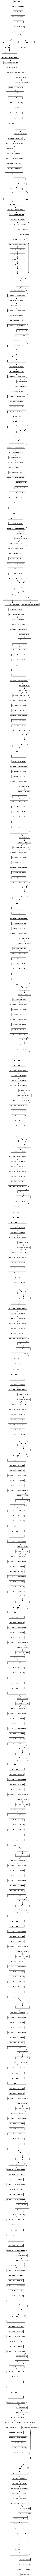

In [ ]:
tf.keras.utils.plot_model(model) 

- 코드 참고: https://www.tensorflow.org/tutorials/images/classification?hl=ko
  -  관례상 2의 배수  사용 : GPU 연산
  -  vgg 3x3:  클수록 큰 특징을 찾지만 작은것을 여러개 겹치면 비선형성 증가해서 큰거와 비슷하거나 더 좋은 성능을 냄.갯수가 작은 kernel filter 여러개 겹치면 더 좋음
  - AlexNet과 마찬가지로 레이어가 많이 없어 relu
  - ResNet과 같이 레이어 많을 수 복잡한 문제 해결할 수 있지만 학습이 안 되기 때문에 Batch Normalization 사용

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

#### addons
- SIG Addons에서 관리하는 TensorFlow에서 사용할 수 없는 새로운 기능을 구현하는 커뮤니티 참여 저장소
- 매번 업데이트 할수 없으므로 일정기간동안 테스트하는 기간이 필요하여 tensorflow experimental, 텐서플로우 adson내에서 관리
  - 예. 정규화레이어 https://www.tensorflow.org/addons/tutorials/layers_normalizations?hl=ko